In [10]:
pip install scikit-image

     ---------------------------------------- 0.0/23.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/23.7 MB 1.3 MB/s eta 0:00:19
     ---------------------------------------- 0.2/23.7 MB 2.2 MB/s eta 0:00:11
      --------------------------------------- 0.4/23.7 MB 2.9 MB/s eta 0:00:09
     - -------------------------------------- 0.6/23.7 MB 3.5 MB/s eta 0:00:07
     -- ------------------------------------- 1.2/23.7 MB 5.6 MB/s eta 0:00:04
     ---- ----------------------------------- 2.7/23.7 MB 9.9 MB/s eta 0:00:03
     ------ --------------------------------- 4.1/23.7 MB 13.0 MB/s eta 0:00:02
     --------- ------------------------------ 5.6/23.7 MB 15.4 MB/s eta 0:00:02
     ----------- ---------------------------- 7.0/23.7 MB 17.2 MB/s eta 0:00:01
     ----------- ---------------------------- 7.0/23.7 MB 17.2 MB/s eta 0:00:01
     ----------- ---------------------------- 7.0/23.7 MB 17.2 MB/s eta 0:00:01
     -------------- ------------------------- 8.8/23.7

In [1]:
import os
import random
import tensorflow as tf
import keras
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import numpy as np

In [ ]:
tf.__version__

In [ ]:
keras.__version__

In [2]:
VALUES = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [ ]:
# main_dir='C:/Users/Anusha/ML Mini Project/'
# #source and dest dir
# source_dir=main_dir+'source'
# dest_dir=main_dir+'sign_letters'
# os.mkdir(source_dir)
# os.mkdir(dest_dir)
# for dir1 in values:
#     path=os.path.join(source_dir,dir1)
#     os.mkdir(path)



All directories

In [3]:
#all directories
main_dir='C:/Users/Anusha/ML Mini Project/'

source_dir=main_dir+'source/'
dest_dir=main_dir+'sign_letters/'


train_dir=dest_dir+'training/'
val_dir=dest_dir+'validation/'

#all letters source dir
a_source_dir=source_dir+'A/'
b_source_dir=source_dir+'B/'
c_source_dir=source_dir+'C/'
d_source_dir=source_dir+'D/'
e_source_dir=source_dir+'E/'
f_source_dir=source_dir+'F/'
g_source_dir=source_dir+'G/'
h_source_dir=source_dir+'H/'
i_source_dir=source_dir+'I/'
j_source_dir=source_dir+'J/'
k_source_dir=source_dir+'K/'
l_source_dir=source_dir+'L/'
m_source_dir=source_dir+'M/'
n_source_dir=source_dir+'N/'
o_source_dir=source_dir+'O/'
p_source_dir=source_dir+'P/'
q_source_dir=source_dir+'Q/'
r_source_dir=source_dir+'R/'
s_source_dir=source_dir+'S/'
t_source_dir=source_dir+'T/'
u_source_dir=source_dir+'U/'
v_source_dir=source_dir+'V/'
w_source_dir=source_dir+'W/'
x_source_dir=source_dir+'X/'
y_source_dir=source_dir+'Y/'
z_source_dir=source_dir+'Z/'

#all letters training dir paths
a_train_dir=train_dir+'A/'
b_train_dir=train_dir+'B/'
c_train_dir=train_dir+'C/'
d_train_dir=train_dir+'D/'
e_train_dir=train_dir+'E/'
f_train_dir=train_dir+'F/'
g_train_dir=train_dir+'G/'
h_train_dir=train_dir+'H/'
i_train_dir=train_dir+'I/'
j_train_dir=train_dir+'J/'
k_train_dir=train_dir+'K/'
l_train_dir=train_dir+'L/'
m_train_dir=train_dir+'M/'
n_train_dir=train_dir+'N/'
o_train_dir=train_dir+'O/'
p_train_dir=train_dir+'P/'
q_train_dir=train_dir+'Q/'
r_train_dir=train_dir+'R/'
s_train_dir=train_dir+'S/'
t_train_dir=train_dir+'T/'
u_train_dir=train_dir+'U/'
v_train_dir=train_dir+'V/'
w_train_dir=train_dir+'W/'
x_train_dir=train_dir+'X/'
y_train_dir=train_dir+'Y/'
z_train_dir=train_dir+'Z/'

#all letters validation dir paths
a_val_dir=val_dir+'A/'
b_val_dir=val_dir+'B/'
c_val_dir=val_dir+'C/'
d_val_dir=val_dir+'D/'
e_val_dir=val_dir+'E/'
f_val_dir=val_dir+'F/'
g_val_dir=val_dir+'G/'
h_val_dir=val_dir+'H/'
i_val_dir=val_dir+'I/'
j_val_dir=val_dir+'J/'
k_val_dir=val_dir+'K/'
l_val_dir=val_dir+'L/'
m_val_dir=val_dir+'M/'
n_val_dir=val_dir+'N/'
o_val_dir=val_dir+'O/'
p_val_dir=val_dir+'P/'
q_val_dir=val_dir+'Q/'
r_val_dir=val_dir+'R/'
s_val_dir=val_dir+'S/'
t_val_dir=val_dir+'T/'
u_val_dir=val_dir+'U/'
v_val_dir=val_dir+'V/'
w_val_dir=val_dir+'W/'
x_val_dir=val_dir+'X/'
y_val_dir=val_dir+'Y/'
z_val_dir=val_dir+'Z/'

#list of all source dir
ALL_SOURCE=[a_source_dir,
b_source_dir,
c_source_dir,
d_source_dir,
e_source_dir,
f_source_dir,
g_source_dir,
h_source_dir,
i_source_dir,
j_source_dir,
k_source_dir,
l_source_dir,
m_source_dir,
n_source_dir,
o_source_dir,
p_source_dir,
q_source_dir,
r_source_dir,
s_source_dir,
t_source_dir,
u_source_dir,
v_source_dir,
w_source_dir,
x_source_dir,
y_source_dir,
z_source_dir,
]

Workflow:

1.Source --> A,B,C....Z
   Each with 20 images **(Done)**
    
   Rename such that they have their names as 'letter_(anything)' e.g 'A_0_..' or 'A_123'. (It should start with 'A_')**(Done)**
    
2.Augment images within source

   Each image giving 20-25 images
   
   Now a total of 400-500 images in a single letter in source
 
3.We'll split them to training and validation dataset

4.Create model and give training data as input where image augmentation will again be used.

5.We'll test with validation data

6.Plot the training and validation accuracy and losses


In [8]:
#Renaming images
def main():
    folder='test'
 
    for count,sub in enumerate(os.listdir(folder)):
        subfolder=sub
        for val,file in enumerate(os.listdir(os.path.join(folder,subfolder))):
            name = f"{subfolder}_{val}.jpg"
            src =f"{os.path.join(folder,subfolder)}/{file}"  
            dst =f"{os.path.join(folder,subfolder)}/{name}"
            os.rename(src,dst)
if __name__=='__main__':
    main()

In [3]:
#augmenting images within source
# VALUES_1=['A','B','C','D','E','F','L','M','N','O','R','S','T','V','W','X','Y','Z']
# VALUES_2=['G','H','I','J','K','P','Q','U']
datagen=ImageDataGenerator(rescale=1/255,
                         rotation_range=30,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.15,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         fill_mode='nearest')


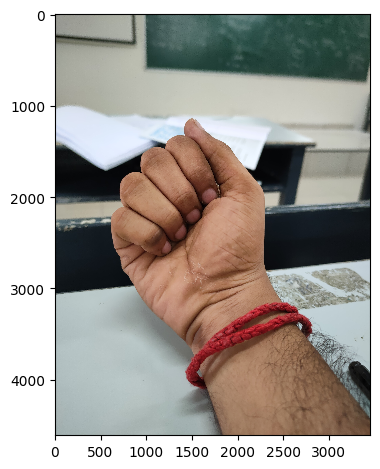

In [10]:
path='./image_collect/A_0.jpg'
x = io.imread(path)
io.imshow(x)
x = x.reshape((1, ) + x.shape)

In [13]:
i = 0
for batch in datagen.flow(x, batch_size=1,  
                          save_to_dir='result', 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 20:
        break

In [22]:
folder='source'
for i,let in enumerate(VALUES[2:]):
    DIR=os.path.join(folder,let)+'/'
    for j,img in enumerate(os.listdir(DIR)):     
        x=io.imread(os.path.join(DIR,img))
        x=x.reshape((1,)+x.shape)
        p=0
        for batch in datagen.flow(x,
                            batch_size=10,
                            save_to_dir=DIR,
                            save_prefix=let,
                            save_format='jpg'):
            p=p+1
            if p>3:
                break

KeyboardInterrupt: 

In [ ]:
# folder='source'
# let='C'
# for i,file in enumerate(os.listdir(c_source_dir)):
#     x=io.imread(folder+'/'+let+'/'+file)
#     x=x.reshape((1,)+x.shape)
#     p=0
#     for batch in datagen.flow(x,
#                         batch_size=20,
#                         save_to_dir=c_source_dir,
#                         save_prefix='C',
#                         save_format='jpg'):
#         p=p+1
#         if p>9:
#             break


In [17]:
c_source_dir

'C:/Users/Anusha/ML Mini Project/source/C/'

In [13]:
os.listdir(c_source_dir)

['C_0.jpg',
 'C_1.jpg',
 'C_10.jpg',
 'C_11.jpg',
 'C_12.jpg',
 'C_13.jpg',
 'C_14.jpg',
 'C_15.jpg',
 'C_16.jpg',
 'C_17.jpg',
 'C_18.jpg',
 'C_19.jpg',
 'C_2.jpg',
 'C_3.jpg',
 'C_4.jpg',
 'C_5.jpg',
 'C_6.jpg',
 'C_7.jpg',
 'C_8.jpg',
 'C_9.jpg']

In [ ]:
os.listdir(ALL_SOURCE[1])

In [ ]:
VALUES

In [ ]:
#function to split data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE_DIR):
      file = SOURCE_DIR + filename
      if os.path.getsize(file) > 0:
          files.append(filename)
      else:
          print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
      this_file = SOURCE_DIR + filename
      destination = TRAINING_DIR + filename
      copyfile(this_file, destination)

  for filename in testing_set:
      this_file = SOURCE_DIR + filename
      destination = VALIDATION_DIR + filename
      copyfile(this_file, destination)


In [ ]:
split_size=0.8
split_data(h_source_dir,h_train_dir,h_val_dir,split_size)
#finished till h

In [ ]:
values=[]
for i,val in enumerate(VALUES):
    values.append(val.lower())

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, SAV_TRAIN_DIR, SAV_VAL_DIR,LTR):
 
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=100,
                                                      target_size=(150,150),
                                                      save_to_dir=SAV_TRAIN_DIR,
                                                      save_format='jpg',
                                                      save_prefix=LTR)
  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                target_size=(150,150),
                                                                save_to_dir=SAV_VAL_DIR,
                                                                save_format='jpg',
                                                                save_prefix=LTR)
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(train_dir, val_dir,'a_train_dir','a_val_dir','A')